# PCA

In [1]:
from keras.datasets import mnist    # keras is a library
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()   # loading the data

X_train.shape 
(600000, 28, 28)

if you see X_train so it's a 60000 examples too large so currently i'm not using it, i'm taking x_test

In [3]:
X_test.shape     # so you have 10000 examples and each example have 28*28. Means each example has 784 Dimensions.

(10000, 28, 28)

In [4]:
y_test.shape    # 10000 labels corresponding to those images

(10000,)

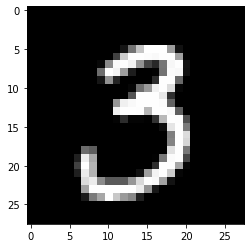

In [50]:
plt.imshow(X_test[90], cmap="gray")

In [51]:
y_test[90]

3

* so now you know each example has 784 Dimensions, so now what we do ? we will convert this 784 Dimn into 2 Dimn and we will visualize all the data points of MNIST into one graph, 

In [7]:
X = X_test.reshape(-1, 28*28)
y = y_test

In [8]:
X.shape 

(10000, 784)

In [9]:
y.shape

(10000,)

# Step 1 - Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler   # StandardScaler is a class 

In [11]:
sc = StandardScaler()  # making the obj of a class

In [12]:
X_ = sc.fit_transform(X)     # sc has a fun fit_transform() that will convert all the x into a new transfromed data x. which 
                             # mean has 0 and std dev = 1.

In [13]:
X_.shape         # the shape will be same

(10000, 784)

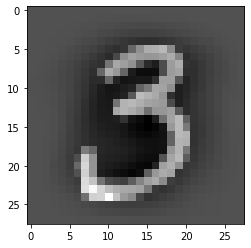

In [14]:
plt.imshow(X_[90].reshape(28,28) , cmap="gray")   # now it's transformed that mean is 0 and variance is 1.

## Sklearn PCA

In [55]:
from sklearn.decomposition import PCA    # sklearn has a class PCA

In [56]:
pca = PCA(n_components=2)  # PCA has a perameter ( n_components ) that tells us how many new component(k) you wanna take 

In [57]:
Z_pca = pca.fit_transform(X_)   # here Z_ is transform data.(data in lower Dimensions)
                                # it will convert X_ that is (m,784) into (m,2)    

In [58]:
Z_pca.shape        # it is converted into 2D (10000, 2)

(10000, 2)

In [59]:
Z_pca          # 2D

array([[-5.45824244,  6.41412594],
       [ 2.80473966, -8.0285761 ],
       [-7.41127251, -3.86407168],
       ...,
       [-5.00437953,  1.15385793],
       [-1.42079126, -4.42358129],
       [13.14259203, -4.26275371]])

In [60]:
# X_  # -> it was in 784 Dimn now it is in 2 Dimn(Z_pca)

# explained_variance_

- In PCA obj there is a property called explained_variance_ which component is explaining how much variance of the data. 
- so original data had 100% variance obviously because that was the original data now we have converted that original data into   smaller part, smaller dimension. that is (2D) so we have taken only 2 principal components that is explains the 41% and 28%   of the total variance 
- of the original data. so these are explaining 70% data. Means we have compressed the data into 2 Dimn but we have lost 30% info.

In [61]:
pca.explained_variance_ 

array([41.39893397, 28.35105806])

# Custom PCA

In [22]:
import numpy as np

# Step 2 - Compute co-variance matrix

In [23]:
covar = np.dot(X_.T, X_)  

In [64]:
X_.T.shape

(784, 10000)

In [65]:
X_.shape

(10000, 784)

In [66]:
covar.shape

(784, 784)

# Step - 3 Compute eigen vectors using SVD (singular value decomposition)

In [25]:
from numpy.linalg import svd    # we have a function linear algebra from that wecan import SVD

In [26]:
# svd()   # it will return 3 things u,s,v

In [27]:
U, S, V = svd(covar)

In [67]:
U.shape

(784, 784)

In [68]:
Ured = U[:, :2]

In [69]:
Ured.shape

(784, 2)

In [72]:
X_.shape

(10000, 784)

# Step 4 - Project of Data on New axis(Components)

In [31]:
Z = np.dot(X_, Ured)

In [73]:
Z.shape

(10000, 2)

In [74]:
Z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

## Visualize Dataset

- we had data of 784 Dimn and we have converted into 2 Dimn that is a huge reduce in the Dimn. for the visualization part we have to eventually convert into 2 Dimn but Generally we don't reduce so much, we have to retain around 90% or 95% of the data. 

In [34]:
import pandas as pd

In [75]:
new_dataset = np.hstack((Z, y.reshape(-1,1)))      # creating the data frame out of this.

In [76]:
dataframe = pd.DataFrame(new_dataset , columns=["PC1", "PC2", "label"])

In [77]:
dataframe.head()

PC1       PC2  label
0  5.458311 -6.414007    7.0
1 -2.804432  8.028850    2.0
2  7.411241  3.864044    1.0
3 -8.751242 -0.045991    0.0
4  0.065756 -6.296290    4.0

<Figure size 1080x1080 with 0 Axes>

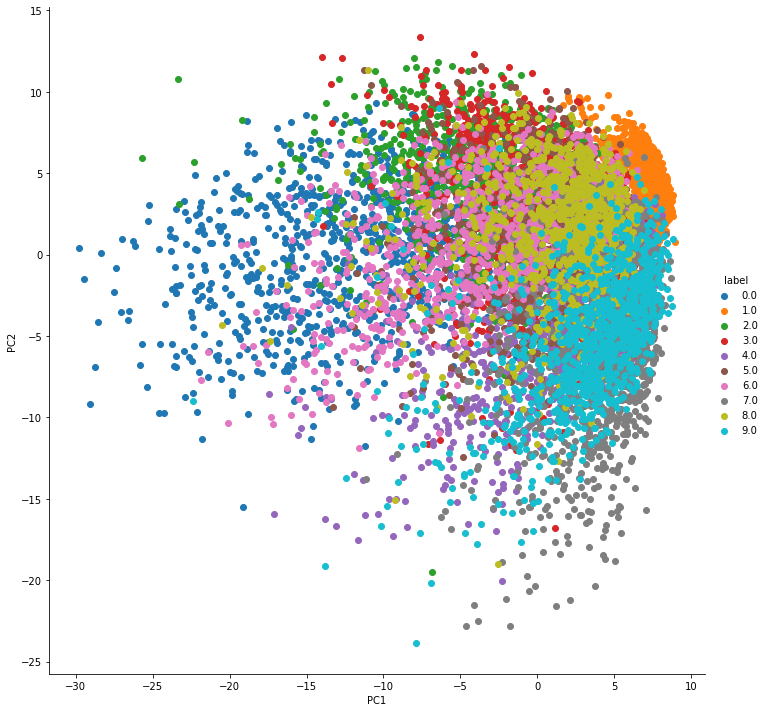

In [78]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue="label", height=10)   
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

# PCA with 784 Dimension

In [39]:
pca = PCA()

In [40]:
Z_pca = pca.fit_transform(X_)

In [41]:
Z_pca.shape

(10000, 784)

In [42]:
pca.explained_variance_  # so the first Dimn explains this much (41 part) of variance. then the second one is explaining 28 part
                         # as you go down you will see it's reducing because the 1st PCA component explains the most of the
                         # varicane. second one is explains the little less than 1st component. last one is explaing very less.

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [43]:
pca.explained_variance_ / np.sum(pca.explained_variance_) # so taking sum of all 784 Dimn of explain_variance and then divide by
                                                          # total sum of variance

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [44]:
pca.explained_variance_ratio_   # there is one more property that is pca ratio 

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [45]:
cum_var_exaplined = np.cumsum(pca.explained_variance_ratio_)  # there is one fun in numpy called cumsum(cumulative sum) 
              # so what it says ? first part is 0.0619 so this is the ratio that the first component is explaining. seconds part
              # is added into first one and the ratio is 0.10 siimilarly 3rd oneis added into starting first two component.
                                

In [46]:
cum_var_exaplined

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

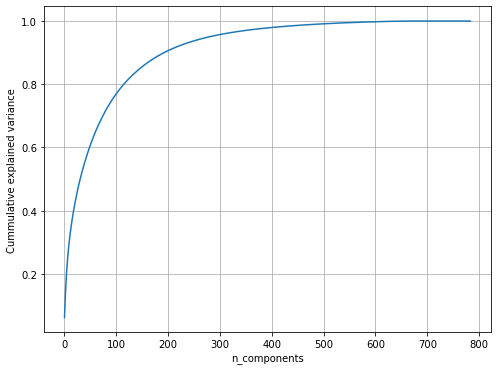

In [47]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_exaplined)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show()